In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model, preprocess_input
import shap
import json

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.5 MB/s eta 0:00:00


In [4]:
model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [5]:
X, y = shap.datasets.imagenet50()

In [6]:
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)


In [7]:
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [12]:
# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

In [13]:
explainer = shap.Explainer(f, masker, output_names=class_names)

In [28]:
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [11:29, 344.60s/it]


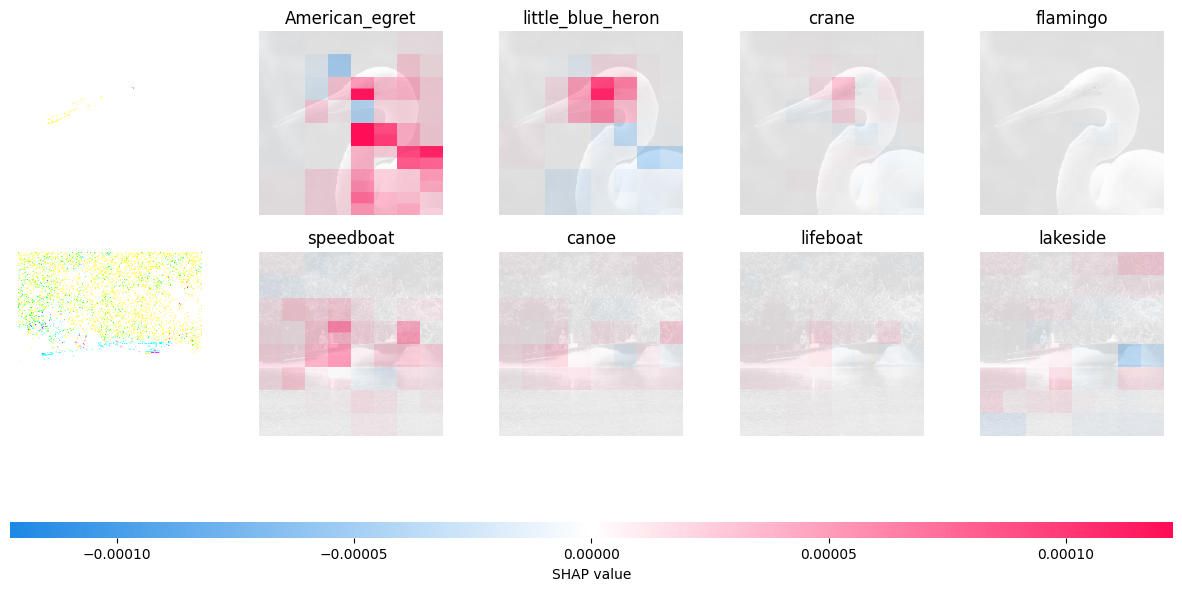

In [29]:
shap.image_plot(shap_values)

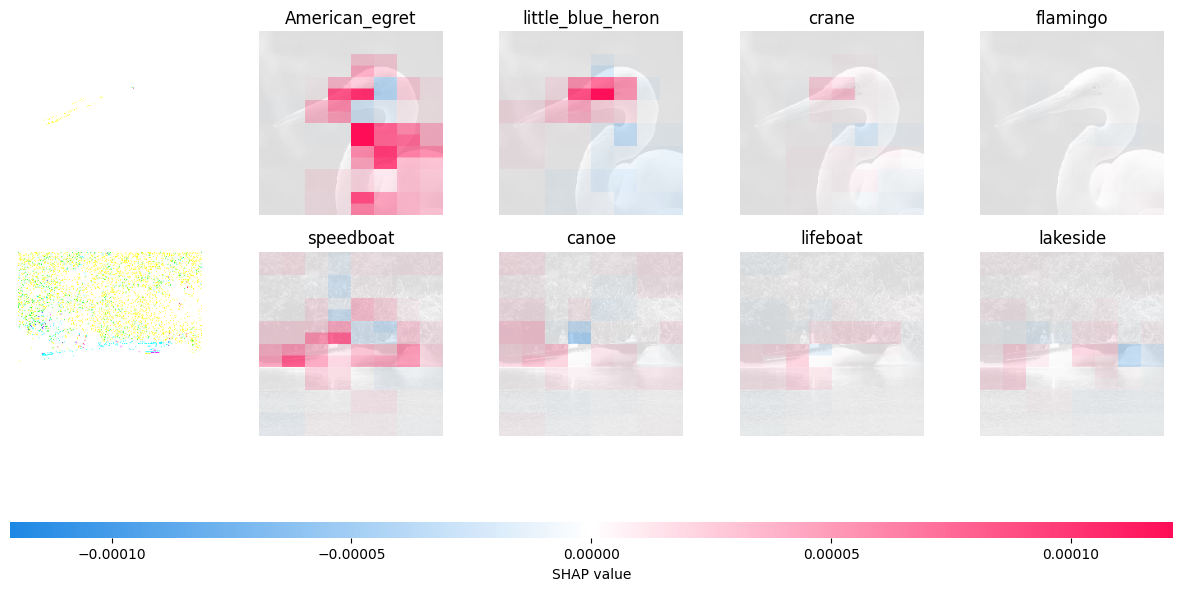

In [11]:
shap.image_plot(shap_values)

In [15]:
X[1].shape

(224, 224, 3)

In [17]:
from tensorflow.keras.preprocessing.image import load_img
img1 = load_img('/content/puppy.jpg', target_size=(224, 224))
img2 = load_img('/content/cat.png', target_size=(224, 224))
img3 = load_img('/content/Jet.png', target_size=(224, 224))

In [21]:
import numpy as np


In [22]:
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

In [24]:
images[0].shape

(224, 224, 3)

In [25]:
shap_values = explainer(images[0:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [11:28<00:00, 170.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [17:11, 343.71s/it]


In [27]:
print(len(class_names))

1000
